### Importing Libraries

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

### Loading Data

In [2]:
#reading data from csv files
df = pd.read_csv("marketing_campaign.csv", sep = ";")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
#checking dimensions of data
df.shape

(2240, 29)

### Exploratory Data Analysis

In [4]:
#summary of numerical data
df.select_dtypes(exclude = 'object').describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [5]:
#summary of categorical data
df.select_dtypes(include = 'object').describe()

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  2012-08-31
freq          1127            864          12

In [6]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Univariate Analysis

In [7]:
def bar_plot(var):
    sns.set_style('dark')
    if df[var].nunique() <= 3:
        plt.figure(figsize = (10,5))
    else:
        plt.figure(figsize = (15,5))
    ax = sns.countplot(x = var, data = df, order = df[var].value_counts().index)
    total = otal = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.title('Distribution of ' + str(var), fontsize = 18)
    plt.xlabel(var.title(), fontsize = 16)
    plt.ylabel('count', fontsize = 16)
    plt.show()

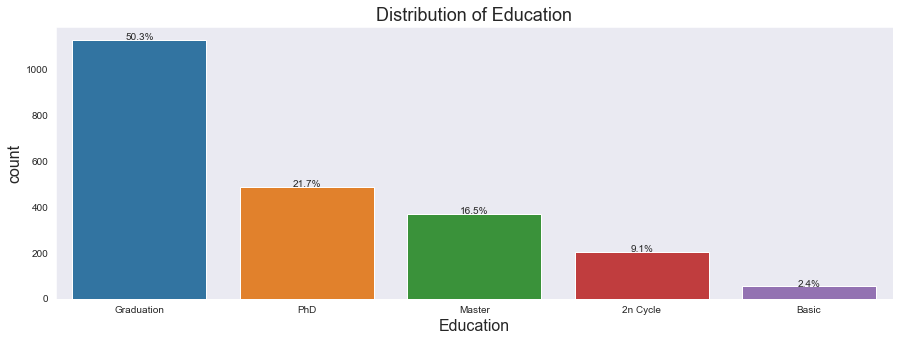

In [8]:
#plotting distribution of Education
bar_plot('Education')

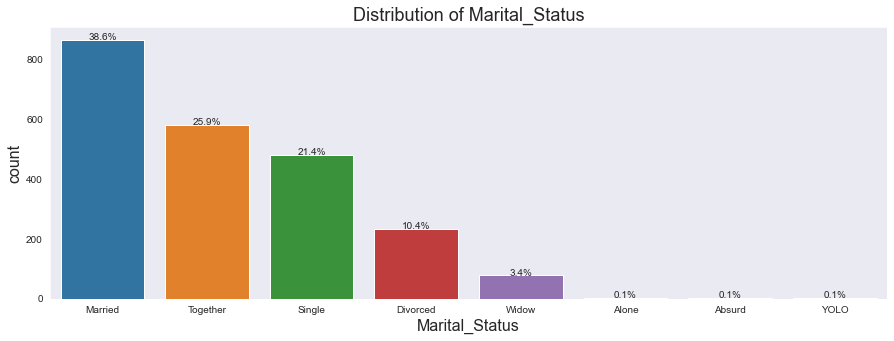

In [9]:
#plotting distribution of Marital Status
bar_plot('Marital_Status')

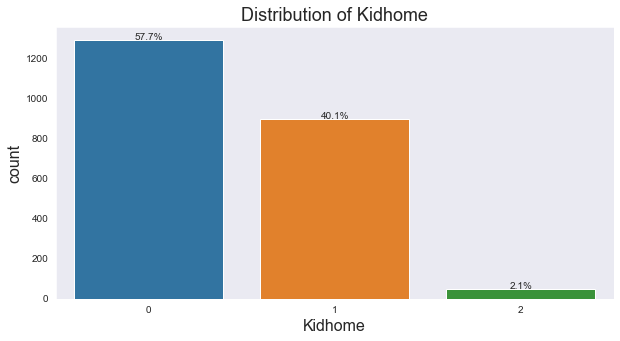

In [10]:
#plotting distribution of Kidhome
bar_plot('Kidhome')

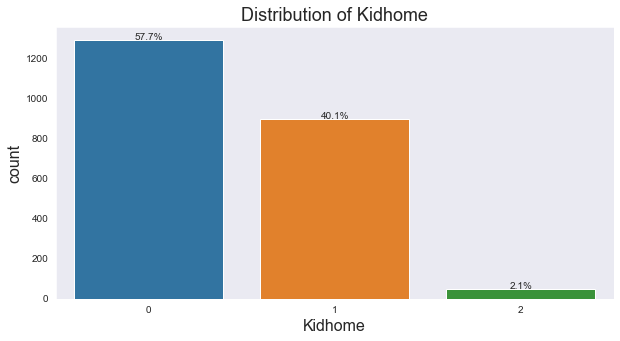

In [11]:
#plotting distributon of Kidhome
bar_plot('Kidhome')

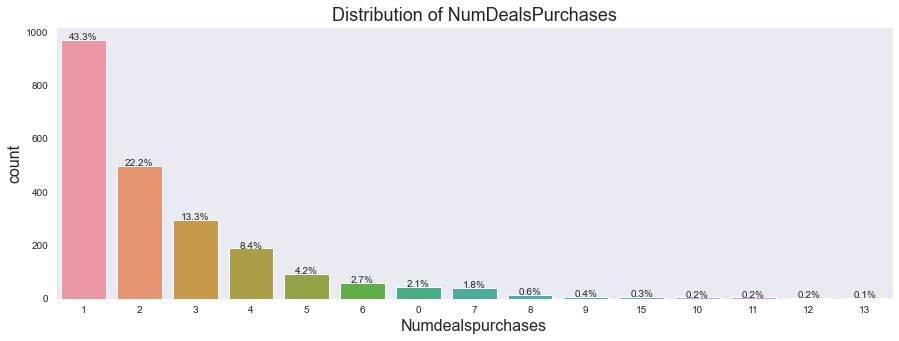

In [12]:
#plotting distribution of NumDealsPurchases
bar_plot("NumDealsPurchases")

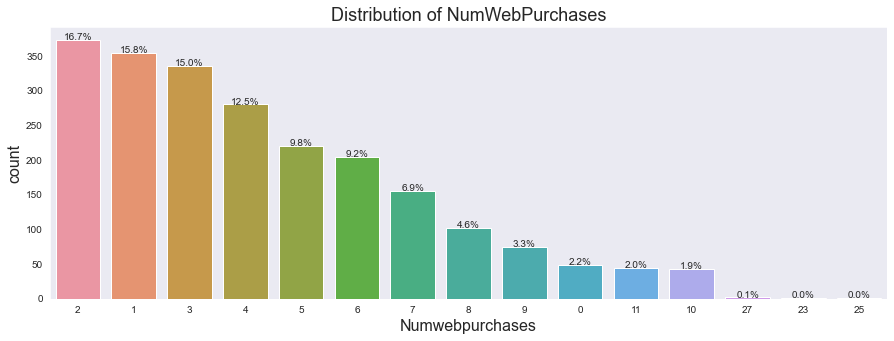

In [13]:
#plotting distribution of NumWebPurchases
bar_plot("NumWebPurchases")

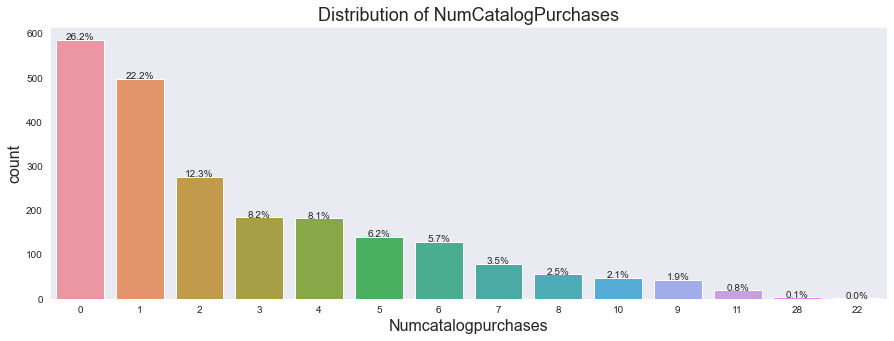

In [14]:
#plotting distribution of NumCatalogPurchases
bar_plot("NumCatalogPurchases")

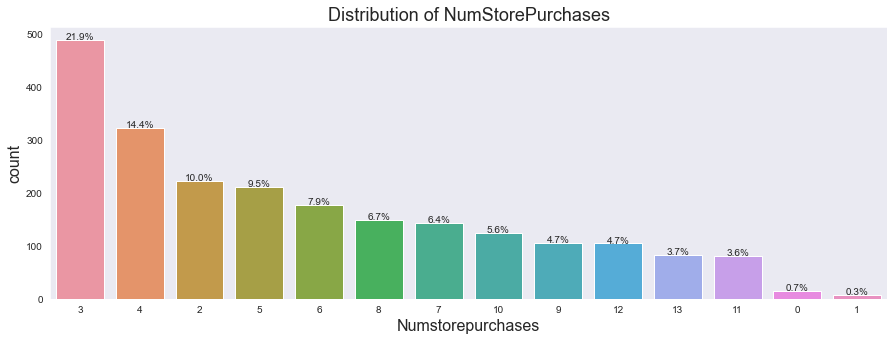

In [15]:
#Plotting distribution of NumStorePurchases
bar_plot('NumStorePurchases')

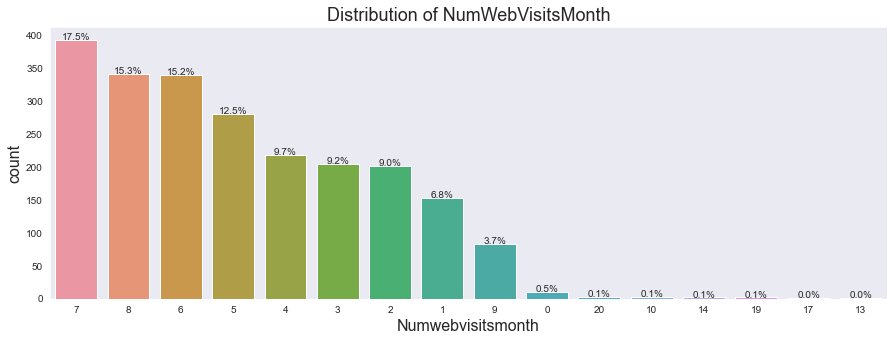

In [16]:
#plotting distribution of NumWebVisitsMonth
bar_plot("NumWebVisitsMonth")

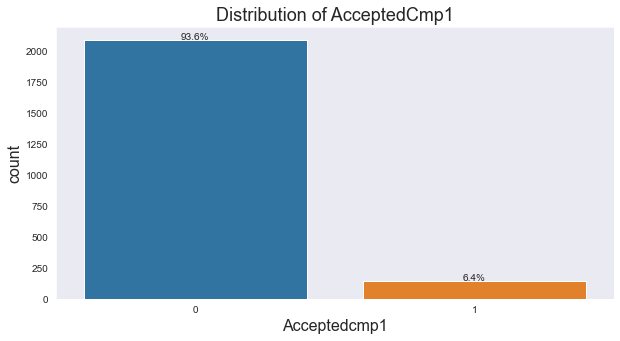

In [17]:
#plotting distribution of AcceptedCmp1
bar_plot("AcceptedCmp1")

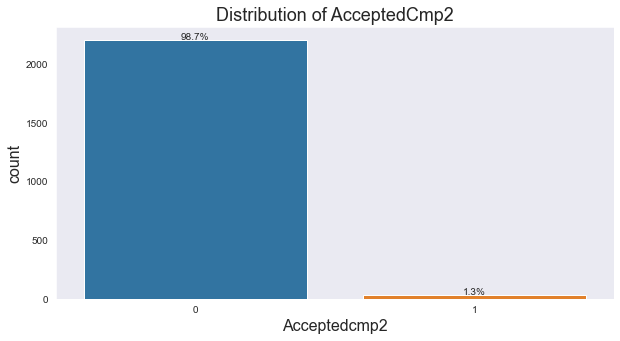

In [18]:
#plotting distribution of AcceptedCmp2
bar_plot("AcceptedCmp2")

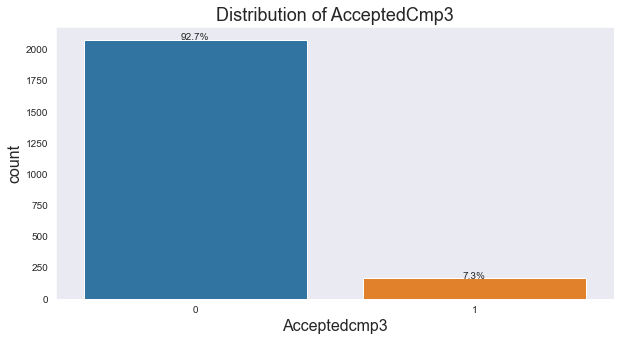

In [19]:
#plotting distribution of AcceptedCmp3
bar_plot("AcceptedCmp3")

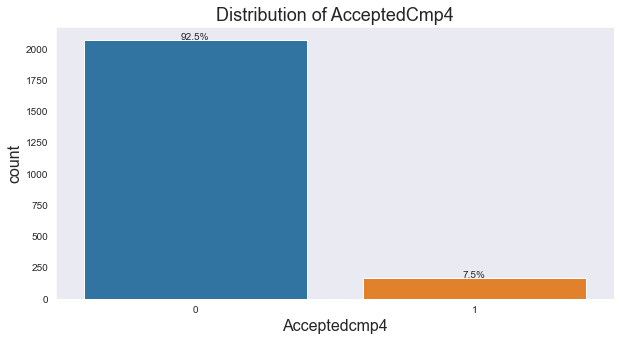

In [20]:
#plotting distribution of AcceptedCmp4
bar_plot("AcceptedCmp4")

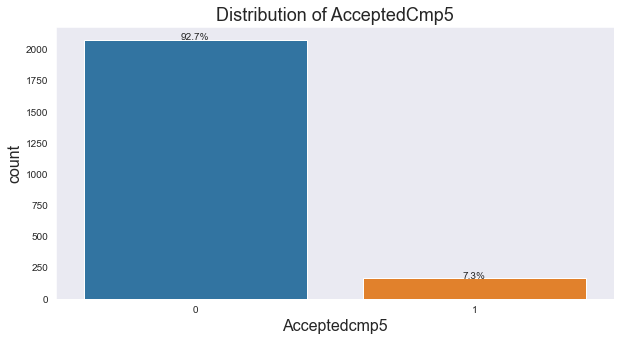

In [21]:
#plotting distribution of AcceptedCmp5
bar_plot("AcceptedCmp5")

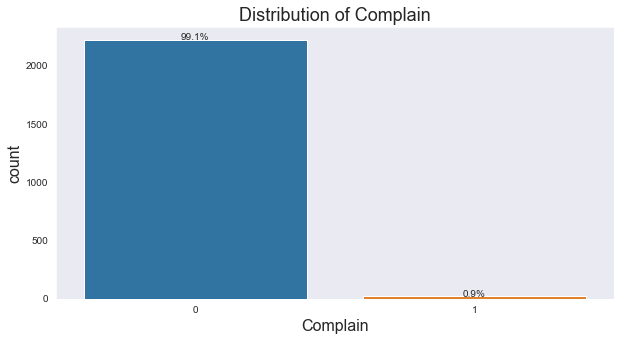

In [22]:
#plotting distribution of Complain
bar_plot("Complain")

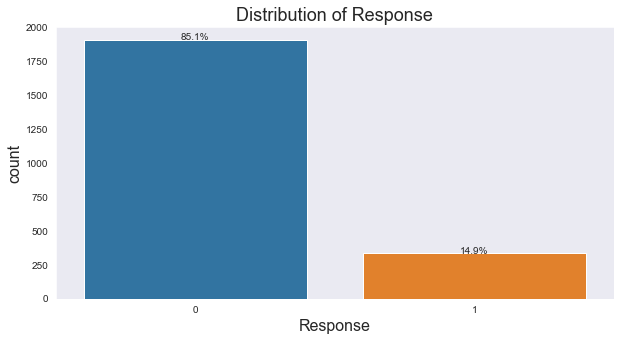

In [23]:
#plotting distribtuion of output variable Respons
bar_plot('Response')

In [24]:
#function for visualizing numerical data
def num_plot(var):
    plt.figure(figsize = (15,5))
    plt.subplot(121)
    sns.histplot(x = var, data = df)
    plt.title("Distribution of " + str(var), fontsize = 18)
    plt.xlabel(var, fontsize = 16)
    plt.ylabel("Count", fontsize = 16)
    plt.subplot(122)
    sns.boxplot(x = var, data = df)
    plt.title("Distribution of "+var, fontsize = 18)
    plt.xlabel(var, fontsize = 16)
    plt.ylabel("Count", fontsize = 16)
    plt.show()

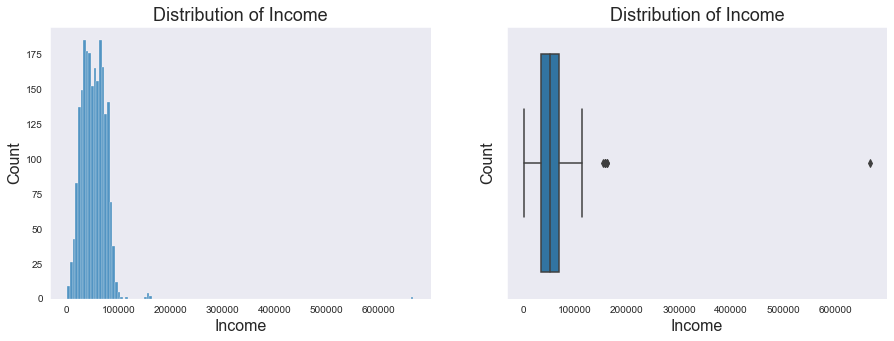

In [25]:
#visualizing Income variable
num_plot('Income')

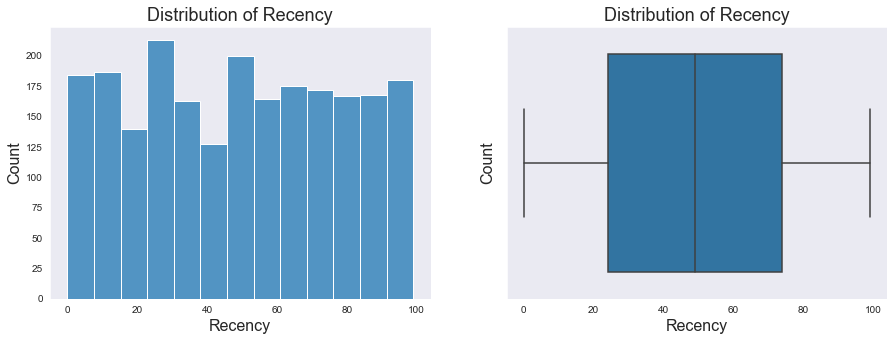

In [26]:
#plotting distribution of Recency
num_plot("Recency")

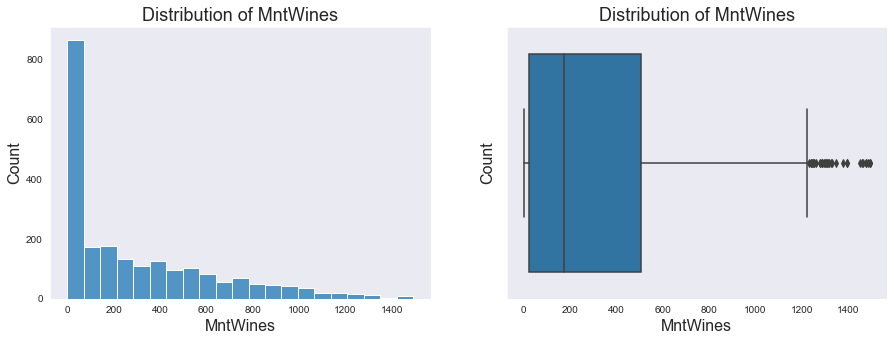

In [27]:
#plotting distribution of MntWines
num_plot("MntWines")

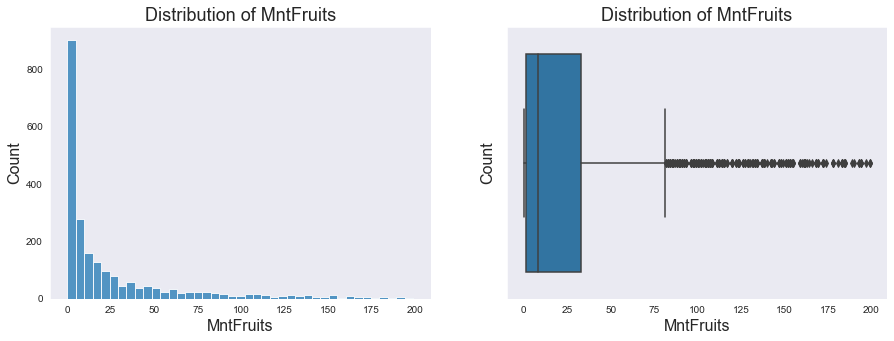

In [28]:
#plotting distribution of MntFruits
num_plot("MntFruits")

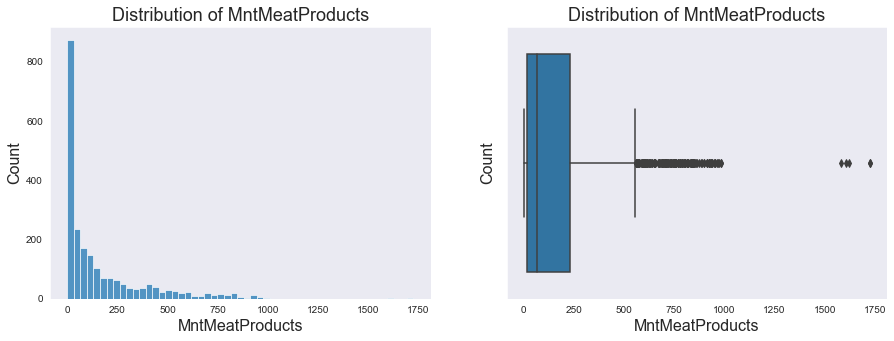

In [29]:
#plotting distribution of MntMeatProducts
num_plot("MntMeatProducts")

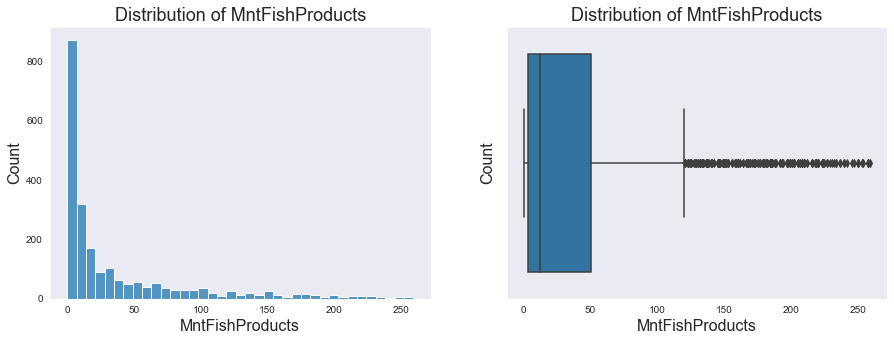

In [30]:
#plotting distribution of MntFishProducts
num_plot("MntFishProducts")

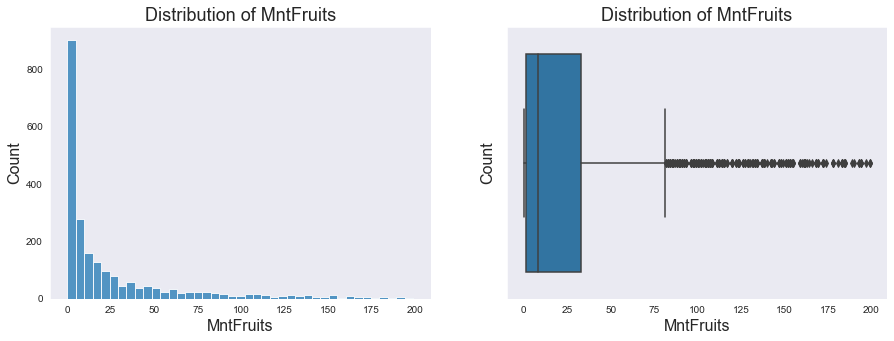

In [31]:
#plotting distribution of MntSweetProducts
num_plot("MntFruits")

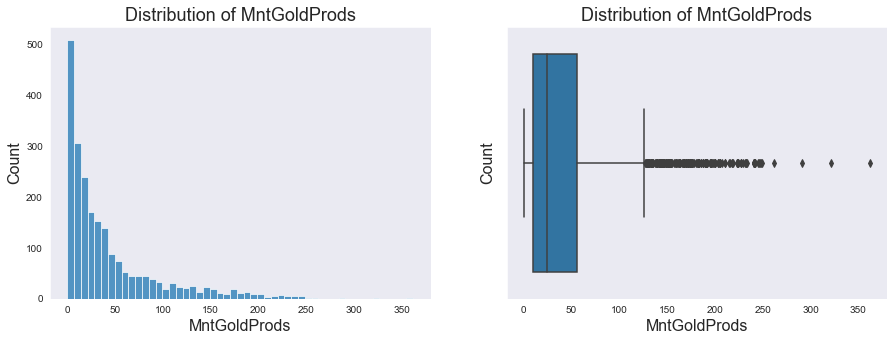

In [32]:
##plotting distribution of MntGoldProds
num_plot("MntGoldProds")

## Bivariate Analysis

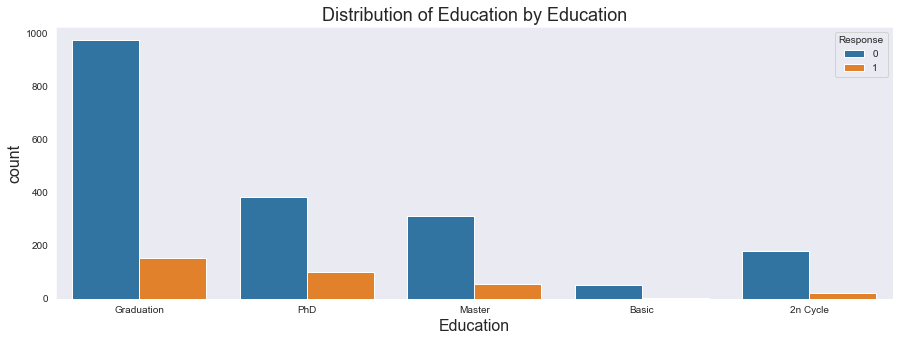

In [33]:
#plotting distribution of Education by Response
def cat_plot(hue, x):
    plt.figure(figsize = (15,5))
    sns.countplot(hue = hue , x = x, data = df)
    plt.title("Distribution of " + str(x) + " by " + str(x) , fontsize = 18)
    plt.xlabel(x, fontsize = 16)
    plt.ylabel("count", fontsize = 16)
    plt.show()
cat_plot("Response", "Education")

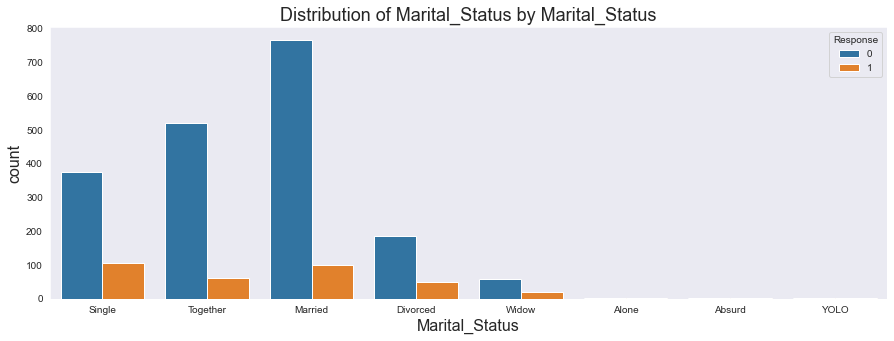

In [34]:
#plotting distribution of Marital_Status by Response
cat_plot("Response", "Marital_Status")

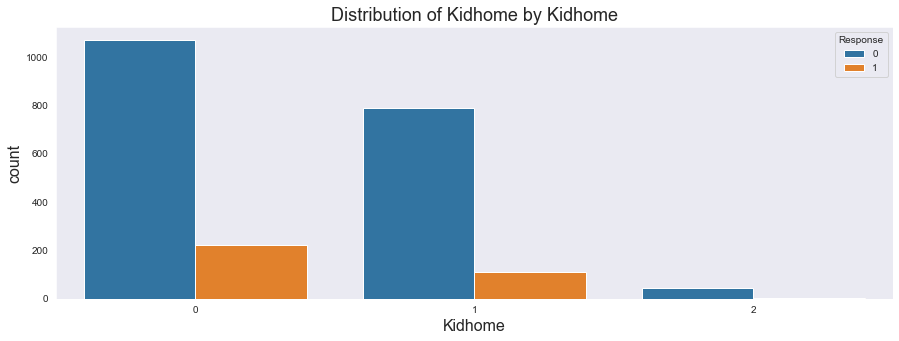

In [35]:
#plotting distribution of Kidhome by Response
cat_plot("Response", "Kidhome")

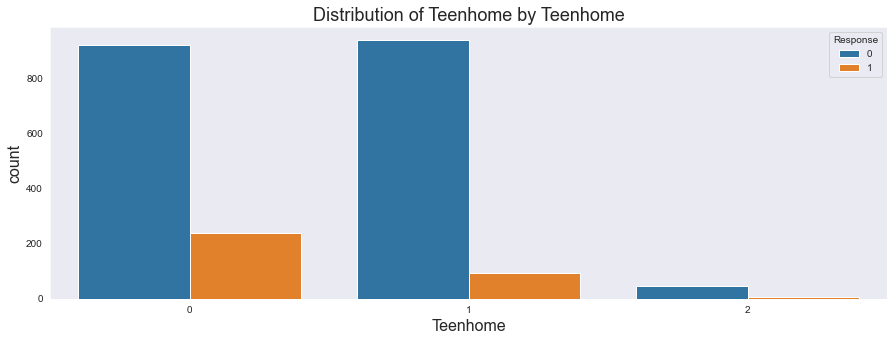

In [36]:
#plotting distribution of Teenhome by Response
cat_plot("Response", "Teenhome")

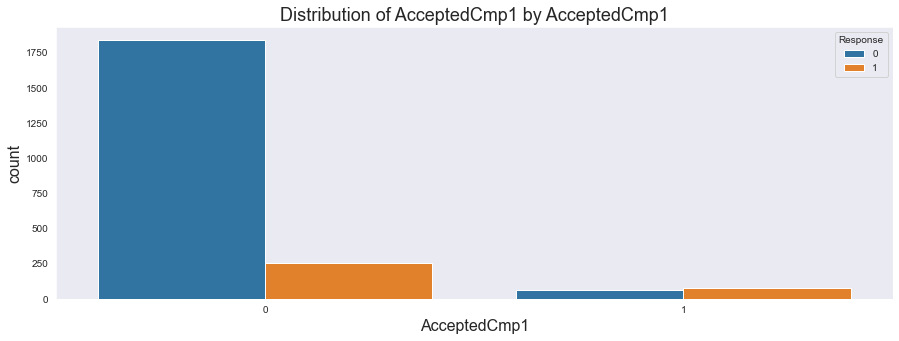

In [37]:
#plotting distribution of AcceptedCmp1 by Response
cat_plot("Response", "AcceptedCmp1")

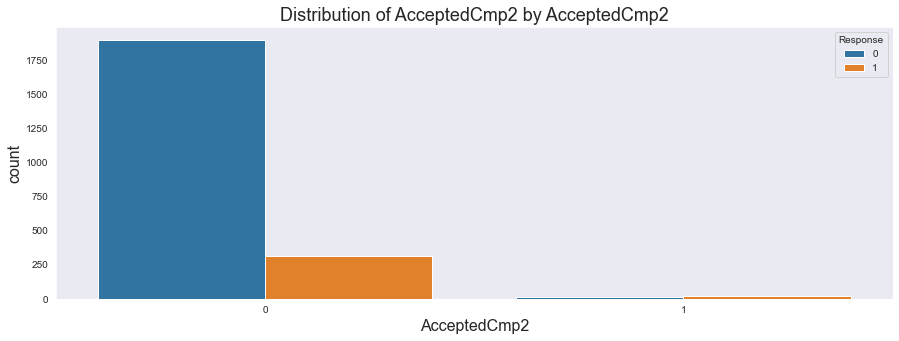

In [38]:
#plotting distribution of AcceptedCmp2 by Response
cat_plot("Response", "AcceptedCmp2")

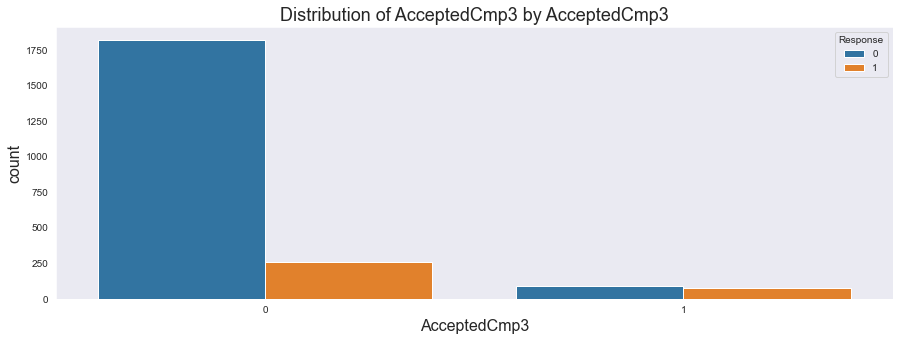

In [39]:
#plotting distribution of AcceptedCmp3 by Response
cat_plot("Response", "AcceptedCmp3")

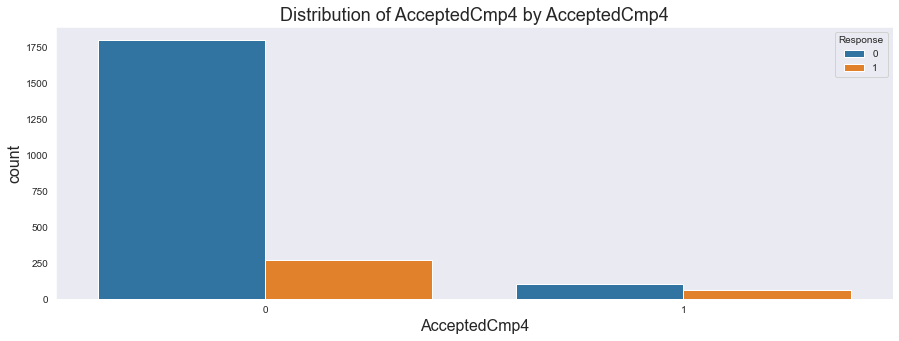

In [40]:
#plotting distribution of AcceptedCmp4 by Response
cat_plot("Response", "AcceptedCmp4")

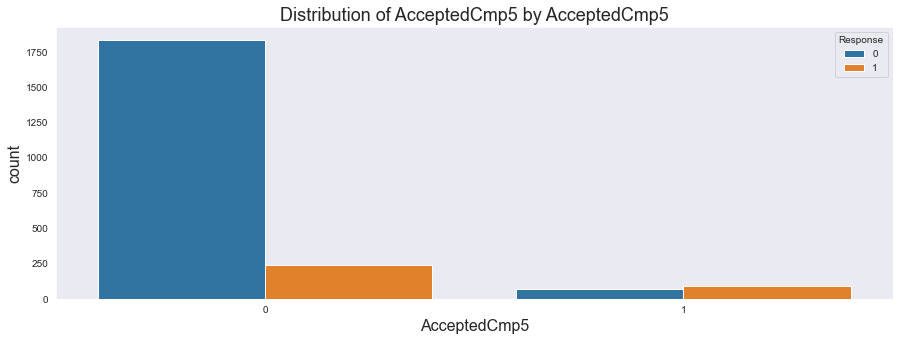

In [41]:
#plotting distribution of AcceptedCmp5 by Response
cat_plot("Response", "AcceptedCmp5")

In [42]:
def box_plot(x, y):
    plt.figure(figsize = (10, 5))
    sns.boxplot(x = x, y = y, data = df)
    plt.title("Distribution of " + str(y) +  "by " +str(x), fontsize = 18)
    plt.xlabel(x, fontsize = 16)
    plt.ylabel(y, fontsize = 16)
    plt.show()


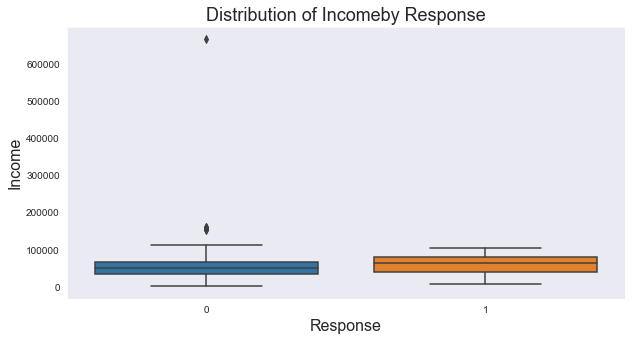

In [43]:
#plotting distribution of Income by Response
box_plot("Response", "Income")

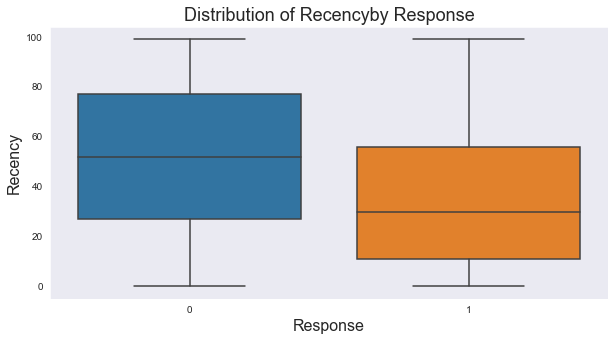

In [44]:
#plotting distribution of Recency by Response
box_plot("Response", "Recency")

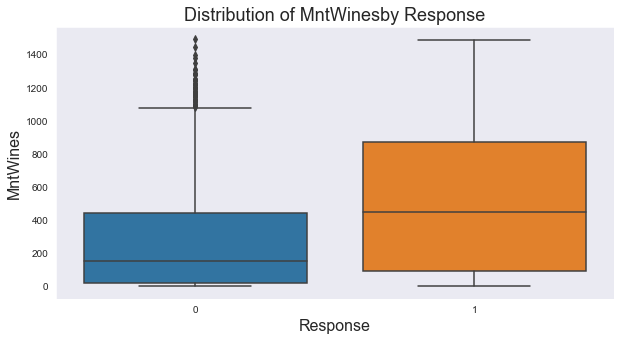

In [45]:
#plotting distribution of MntWines by Response
box_plot("Response", "MntWines")

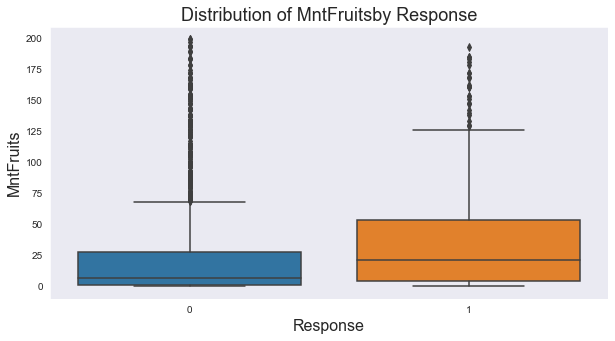

In [46]:
#plotting distribution of MntFruits by Response
box_plot("Response", "MntFruits")

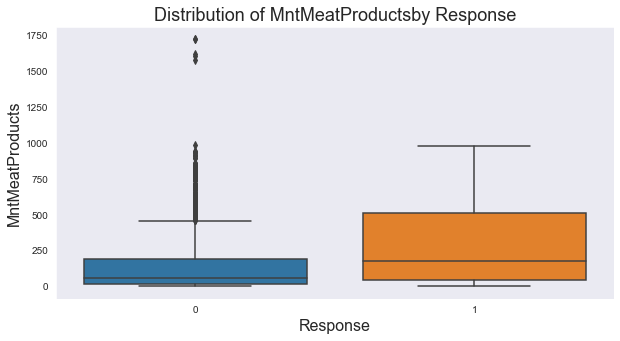

In [47]:
#plotting distribution of MntMeatProducts by Response
box_plot("Response", "MntMeatProducts")

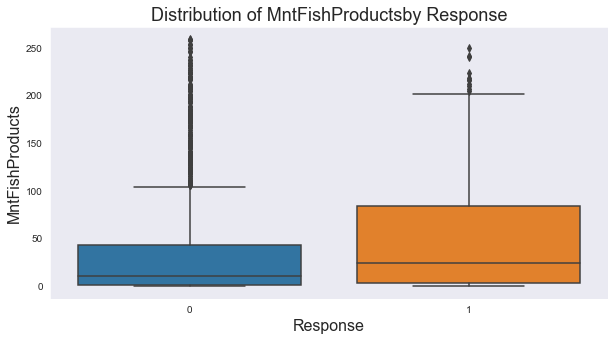

In [48]:
#plotting distribution of MntFishProducts by Response
box_plot("Response", "MntFishProducts")

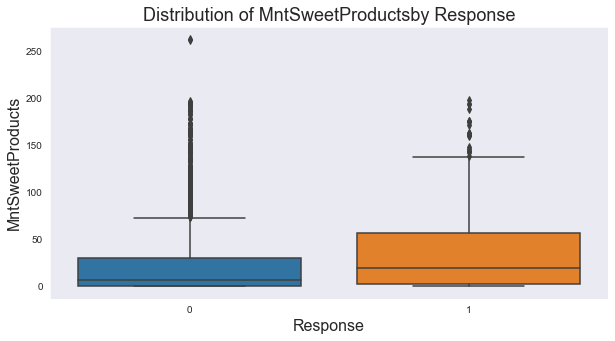

In [49]:
#plotting distribution of MntSweetProducts by Response
box_plot("Response", "MntSweetProducts")

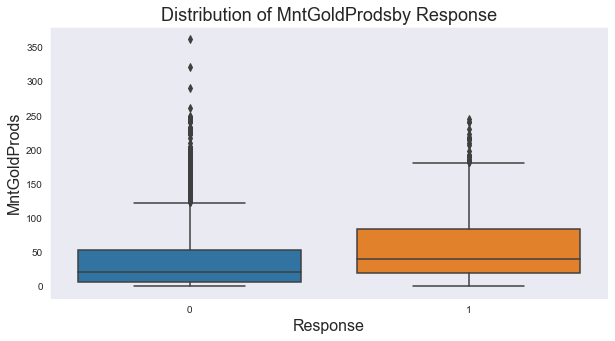

In [50]:
#plotting distribution of MntGoldProds by Response
box_plot("Response", "MntGoldProds")

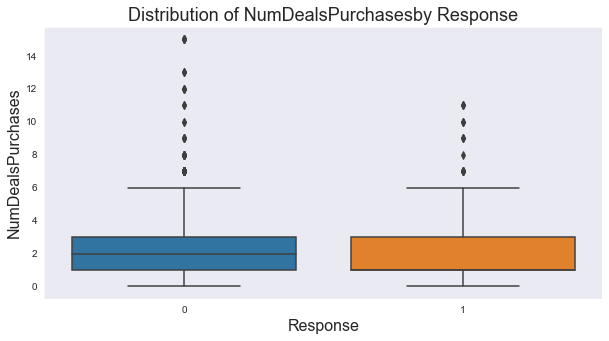

In [51]:
##plotting distribution of NumDealsPurchases by Response
box_plot("Response", "NumDealsPurchases")

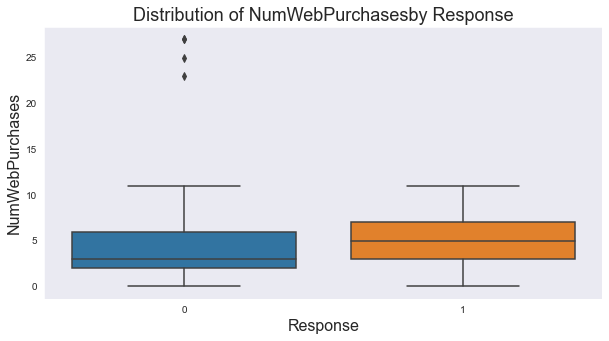

In [52]:
##plotting distribution of NumWebPurchases by Response
box_plot("Response", "NumWebPurchases")

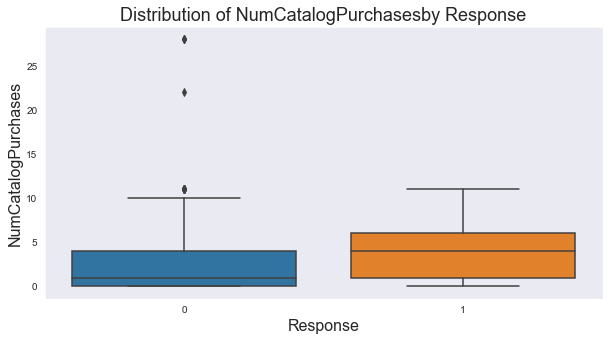

In [53]:
##plotting distribution of NumCatalogPurchases by Response
box_plot("Response", "NumCatalogPurchases")

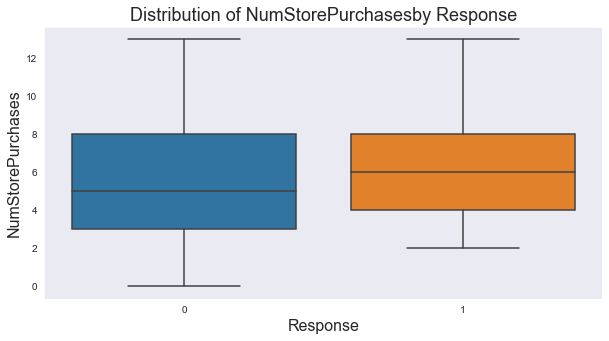

In [54]:
##plotting distribution of NumStorePurchases by Response
box_plot("Response", "NumStorePurchases")

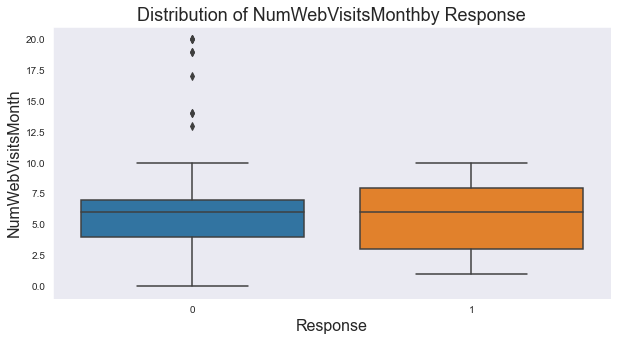

In [55]:
##plotting distribution of NumWebVisitisMonth by Response
box_plot("Response", "NumWebVisitsMonth")

## Multivariate Analysis

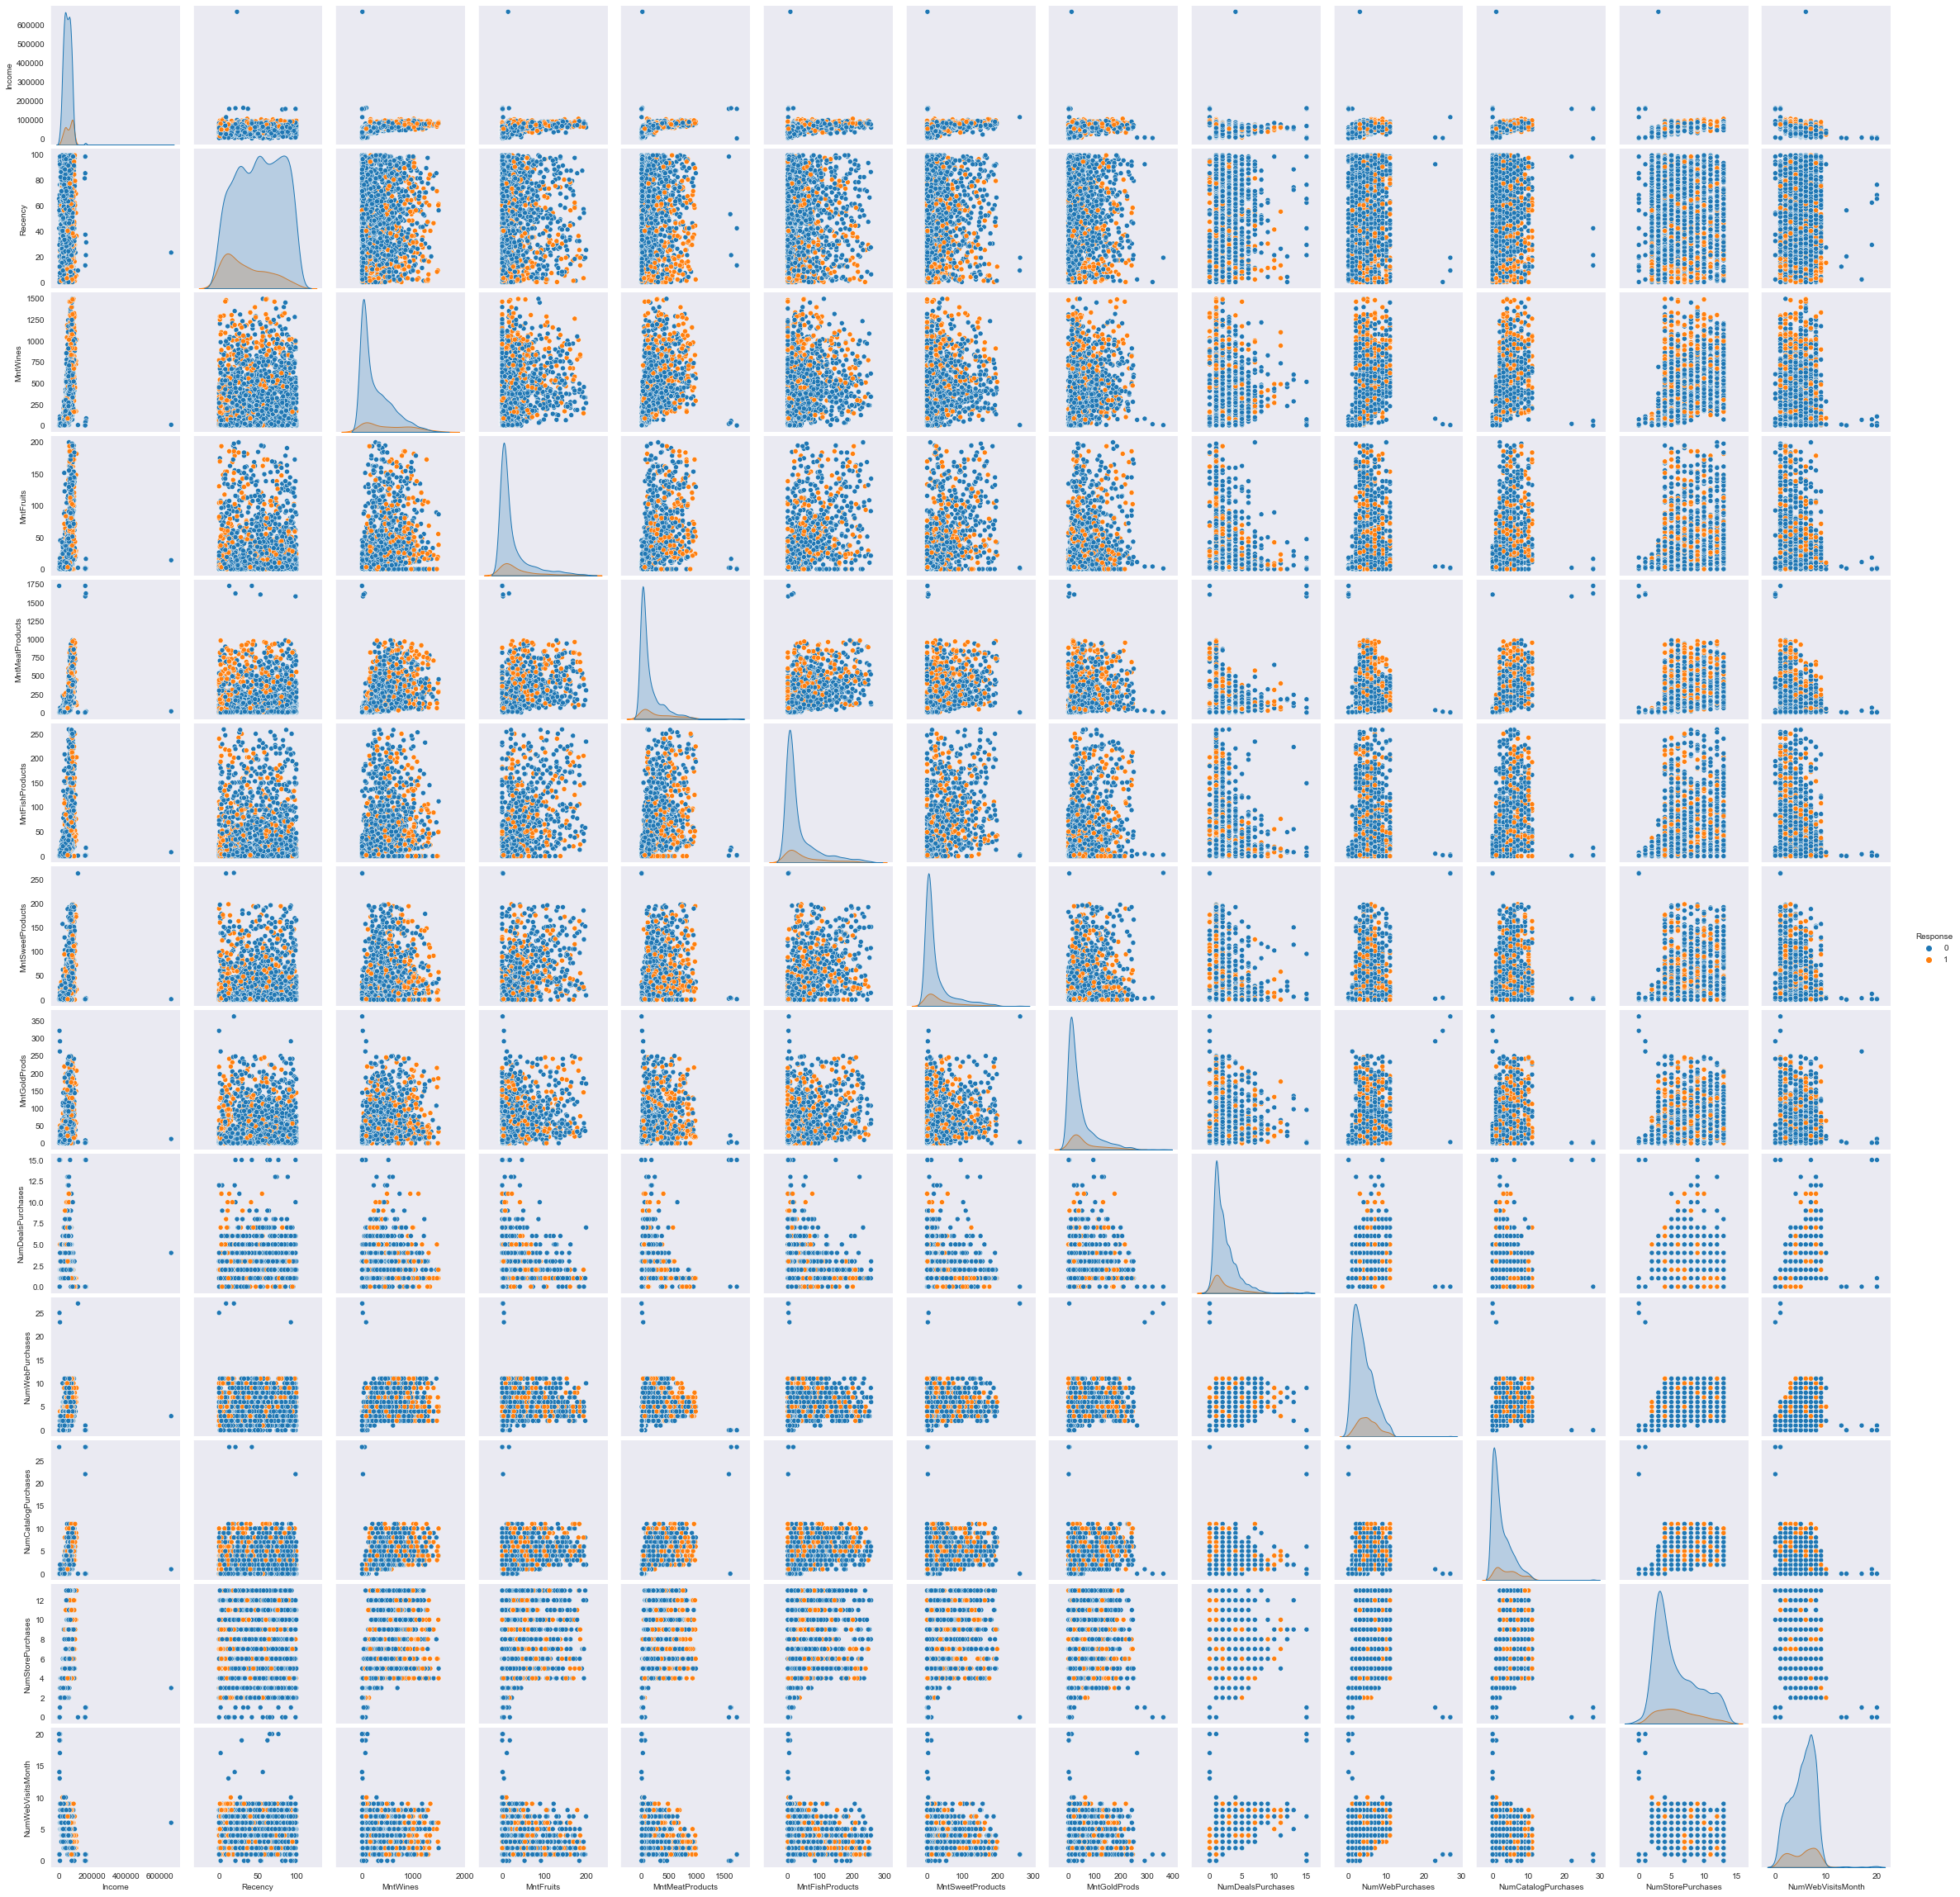

In [56]:
#plotting pairplots of all numerical variables colored by Response
df2 = df.drop(columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue',
                        'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                        'Kidhome', 'Teenhome'])
sns.pairplot(df2, hue = 'Response')
plt.show()

## Data processing

In [57]:
#removing unnecessary columns ID, Year_Birth, Dt_Customer, Z_CostContact, Z_Revenue
df2 = df.drop(columns = ['ID','Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'])

In [58]:
#checking for null values
df2.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [59]:
##filling null values in Income column with mean value
df2['Income'].fillna(df2['Income'].mean(), inplace = True)

## Feature Engineering

### Correlation Heatmap for Numeric Features

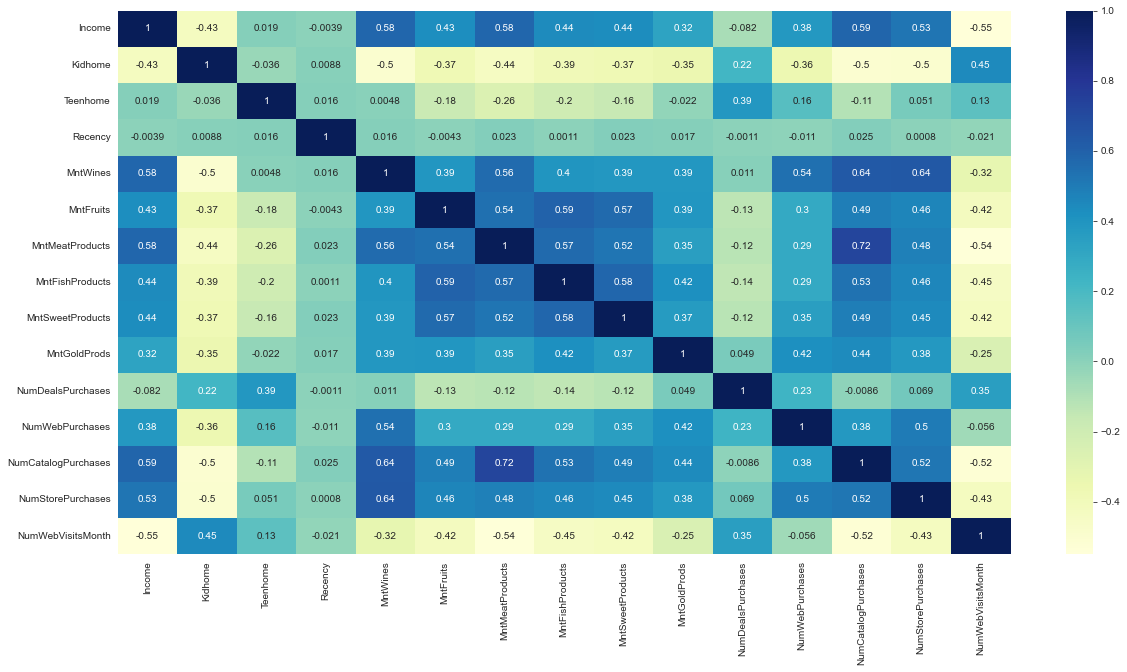

In [60]:
#correlation heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df2[df2.columns[2:-7]].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [61]:
#converting categorical columns to numeric columns
df2 = pd.get_dummies(df2)

In [62]:
#separating input and output features
X = df2.drop(columns = 'Response')
y = df2['Response']

### Scaling Data

In [63]:
#scaling data 
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)
X_scaled

array([[0.08483222, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06709518, 0.5       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.10509733, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.08309221, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10153609, 0.        , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.07690815, 0.5       , 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [64]:
#checking distribbution of output variable
df2['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

### Balancing Data

In [65]:
#balancing data
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler()
X_s, y = sm.fit_resample(X_scaled, y)

In [66]:
#splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 0.3, random_state = 42)

### Model Building

#### Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_accuracy = round(accuracy_score(y_test, lr_preds), 2)
lr_precision = round(precision_score(y_test, lr_preds),2)
lr_auc = round(roc_auc_score(y_test, lr_preds))
lr_f1 = round(f1_score(y_test, lr_preds))
lr_recall = round(recall_score(y_test, lr_preds))
print("Accuracy:\t", lr_accuracy,)
print("*"*30)
print("Precision:\t", lr_precision)
print("*"*30)
print("Recall:\t", lr_recall)
print("*"*30)
print("F1-score:\t", lr_accuracy)
print("*"*30)
print("Roc-AUC Score:\t", lr_auc)
print("*"*30)
print("Classification Report")
print(classification_report(y_test, lr_preds))

Accuracy:	 0.79
******************************
Precision:	 0.79
******************************
Recall:	 1
******************************
F1-score:	 0.79
******************************
Roc-AUC Score:	 1
******************************
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       581
           1       0.79      0.79      0.79       563

    accuracy                           0.79      1144
   macro avg       0.79      0.79      0.79      1144
weighted avg       0.79      0.79      0.79      1144



#### Naive Bayes Model

In [68]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
nb_accuracy = round(accuracy_score(y_test, nb_preds), 2)
nb_precision = round(precision_score(y_test, nb_preds),2)
nb_auc = round(roc_auc_score(y_test, nb_preds))
nb_f1 = round(f1_score(y_test, nb_preds))
nb_recall = round(recall_score(y_test, nb_preds))
print("Accuracy:\t", nb_accuracy,)
print("*"*30)
print("Precision:\t", nb_precision)
print("*"*30)
print("Recall:\t", nb_recall)
print("*"*30)
print("F1-score:\t", nb_accuracy)
print("*"*30)
print("Roc-AUC Score:\t", nb_auc)
print("*"*30)
print("Classification Report")
print(classification_report(y_test, nb_preds))

Accuracy:	 0.67
******************************
Precision:	 0.81
******************************
Recall:	 0
******************************
F1-score:	 0.67
******************************
Roc-AUC Score:	 1
******************************
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.90      0.73       581
           1       0.81      0.42      0.56       563

    accuracy                           0.67      1144
   macro avg       0.71      0.66      0.64      1144
weighted avg       0.71      0.67      0.65      1144



#### Decision Tree Model

In [69]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_accuracy = round(accuracy_score(y_test, dt_preds), 2)
dt_precision = round(precision_score(y_test, dt_preds),2)
dt_auc = round(roc_auc_score(y_test, dt_preds))
dt_f1 = round(f1_score(y_test, dt_preds))
dt_recall = round(recall_score(y_test, dt_preds))
print("Accuracy:\t", dt_accuracy,)
print("*"*30)
print("Precision:\t", dt_precision)
print("*"*30)
print("Recall:\t", dt_recall)
print("*"*30)
print("F1-score:\t", dt_accuracy)
print("*"*30)
print("Roc-AUC Score:\t", dt_auc)
print("*"*30)
print("Classification Report")
print(classification_report(y_test, dt_preds))

Accuracy:	 0.93
******************************
Precision:	 0.88
******************************
Recall:	 1
******************************
F1-score:	 0.93
******************************
Roc-AUC Score:	 1
******************************
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       581
           1       0.88      0.99      0.93       563

    accuracy                           0.93      1144
   macro avg       0.93      0.93      0.93      1144
weighted avg       0.94      0.93      0.93      1144



#### Random Forest Model

In [70]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
rfc_accuracy = round(accuracy_score(y_test, rfc_preds), 2)
rfc_precision = round(precision_score(y_test, rfc_preds),2)
rfc_auc = round(roc_auc_score(y_test, rfc_preds))
rfc_f1 = round(f1_score(y_test, rfc_preds))
rfc_recall = round(recall_score(y_test, rfc_preds))
print("Accuracy:\t", rfc_accuracy,)
print("*"*30)
print("Precision:\t", rfc_precision)
print("*"*30)
print("Recall:\t", rfc_recall)
print("*"*30)
print("F1-score:\t", rfc_accuracy)
print("*"*30)
print("Roc-AUC Score:\t", rfc_auc)
print("*"*30)
print("Classification Report")
print(classification_report(y_test, rfc_preds))

Accuracy:	 0.96
******************************
Precision:	 0.93
******************************
Recall:	 1
******************************
F1-score:	 0.96
******************************
Roc-AUC Score:	 1
******************************
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       581
           1       0.93      0.99      0.96       563

    accuracy                           0.96      1144
   macro avg       0.96      0.96      0.96      1144
weighted avg       0.96      0.96      0.96      1144



### AdaBoost Model

In [71]:
adb = AdaBoostClassifier(base_estimator = LogisticRegression(), n_estimators = 200, random_state = 42)
adb.fit(X_train, y_train)
adb_preds = adb.predict(X_test)
adb_accuracy = round(accuracy_score(y_test, adb_preds), 2)
adb_precision = round(precision_score(y_test, adb_preds),2)
adb_auc = round(roc_auc_score(y_test, adb_preds))
adb_f1 = round(f1_score(y_test, adb_preds))
adb_recall = round(recall_score(y_test, adb_preds))
print("Accuracy:\t", adb_accuracy,)
print("*"*30)
print("Precision:\t", adb_precision)
print("*"*30)
print("Recall:\t", adb_recall)
print("*"*30)
print("F1-score:\t", adb_accuracy)
print("*"*30)
print("Roc-AUC Score:\t", adb_auc)
print("*"*30)
print("Classification Report")
print(classification_report(y_test, adb_preds))

Accuracy:	 0.79
******************************
Precision:	 0.79
******************************
Recall:	 1
******************************
F1-score:	 0.79
******************************
Roc-AUC Score:	 1
******************************
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       581
           1       0.79      0.78      0.79       563

    accuracy                           0.79      1144
   macro avg       0.79      0.79      0.79      1144
weighted avg       0.79      0.79      0.79      1144



## Model Comparison

In [72]:
perf = pd.DataFrame({'Model':['Logistic Regression', 'Gaussian NB', 'Decision Tree', 'Random Forest', 'Ada Boost'],
                    'Accuracy':[lr_accuracy, nb_accuracy, dt_accuracy, rfc_accuracy, adb_accuracy],
                    'Precision':[lr_precision, nb_precision, dt_precision, rfc_precision, adb_precision],
                    'Recall':[lr_recall, nb_recall, dt_recall, rfc_recall, adb_recall],
                    'F1-score':[lr_f1, nb_f1, dt_f1, rfc_f1, adb_f1],
                    'AUC-score':[lr_auc, nb_auc, dt_auc, rfc_auc, adb_auc]})
perf

Model  Accuracy  Precision  Recall  F1-score  AUC-score
0  Logistic Regression      0.79       0.79       1         1          1
1          Gaussian NB      0.67       0.81       0         1          1
2        Decision Tree      0.93       0.88       1         1          1
3        Random Forest      0.96       0.93       1         1          1
4            Ada Boost      0.79       0.79       1         1          1

### Building Final Model

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1312   13]
 [   0 1343]]
ACCURACY SCORE:
0.9951
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     1.000000     0.990413  0.995127     0.995206      0.995174
recall        0.990189     1.000000  0.995127     0.995094      0.995127
f1-score      0.995070     0.995183  0.995127     0.995127      0.995127
support    1325.000000  1343.000000  0.995127  2668.000000   2668.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[543  38]
 [  7 556]]
ACCURACY SCORE:
0.9607
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.987273    0.936027  0.960664     0.961650      0.962053
recall       0.934596    0.987567  0.960664     0.961081      0.960664
f1-score     0.960212    0.961106  0.960664     0.960659      0.960652
support    581.000000  563.000000  0.960664  1144.000000   1144.000000


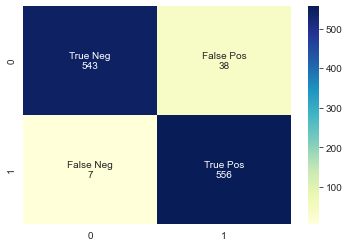

In [73]:
rfc = RandomForestClassifier(random_state = 3)
rfc.fit(X_train, y_train)
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    cf_matrix = confusion_matrix(y_test, y_test_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    roup_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{cf_matrix}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="YlGnBu")
evaluate(rfc,  X_train, X_test, y_train, y_test)